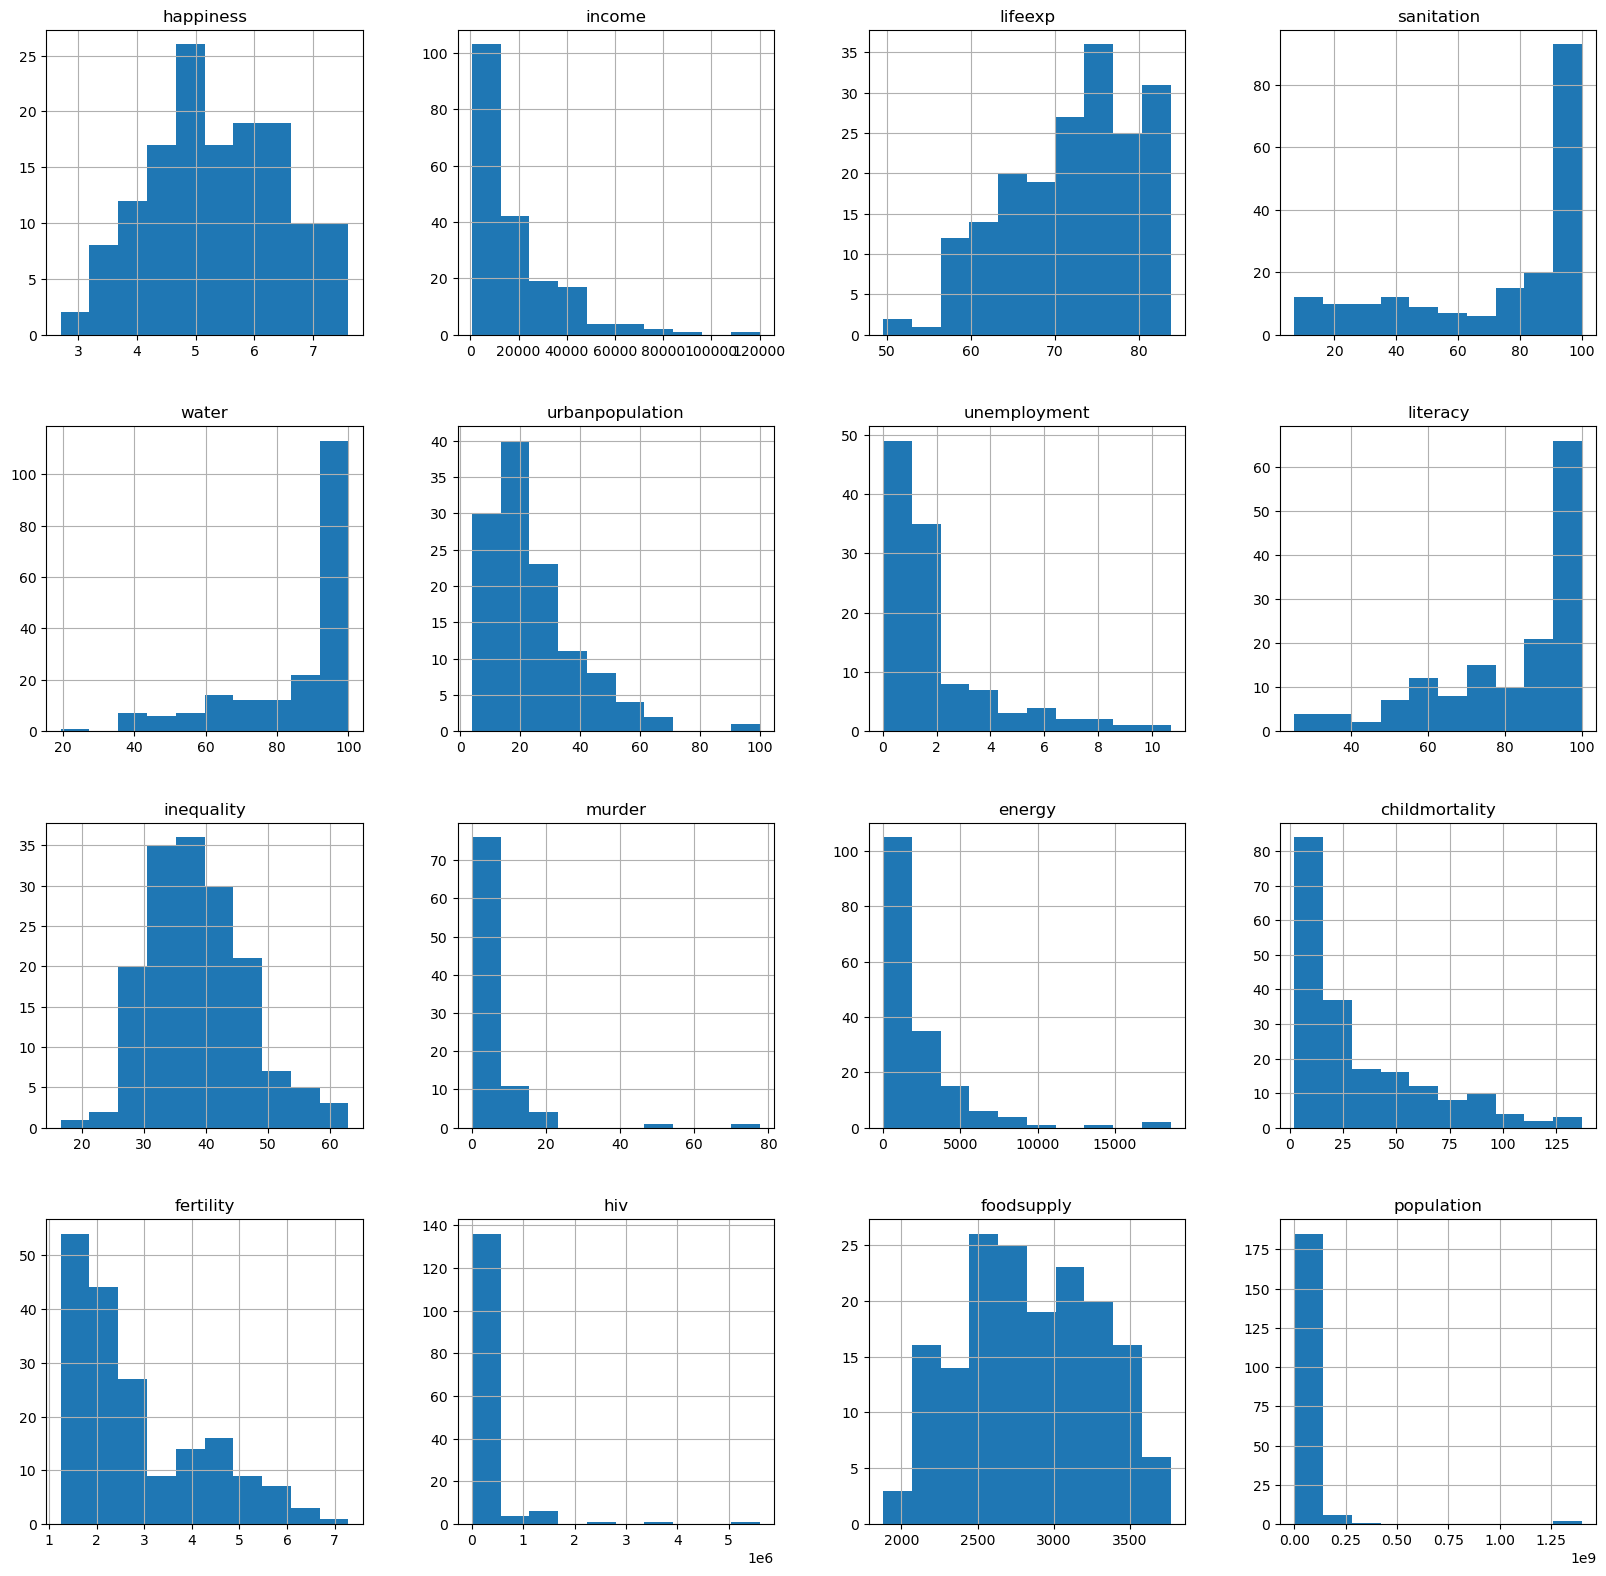

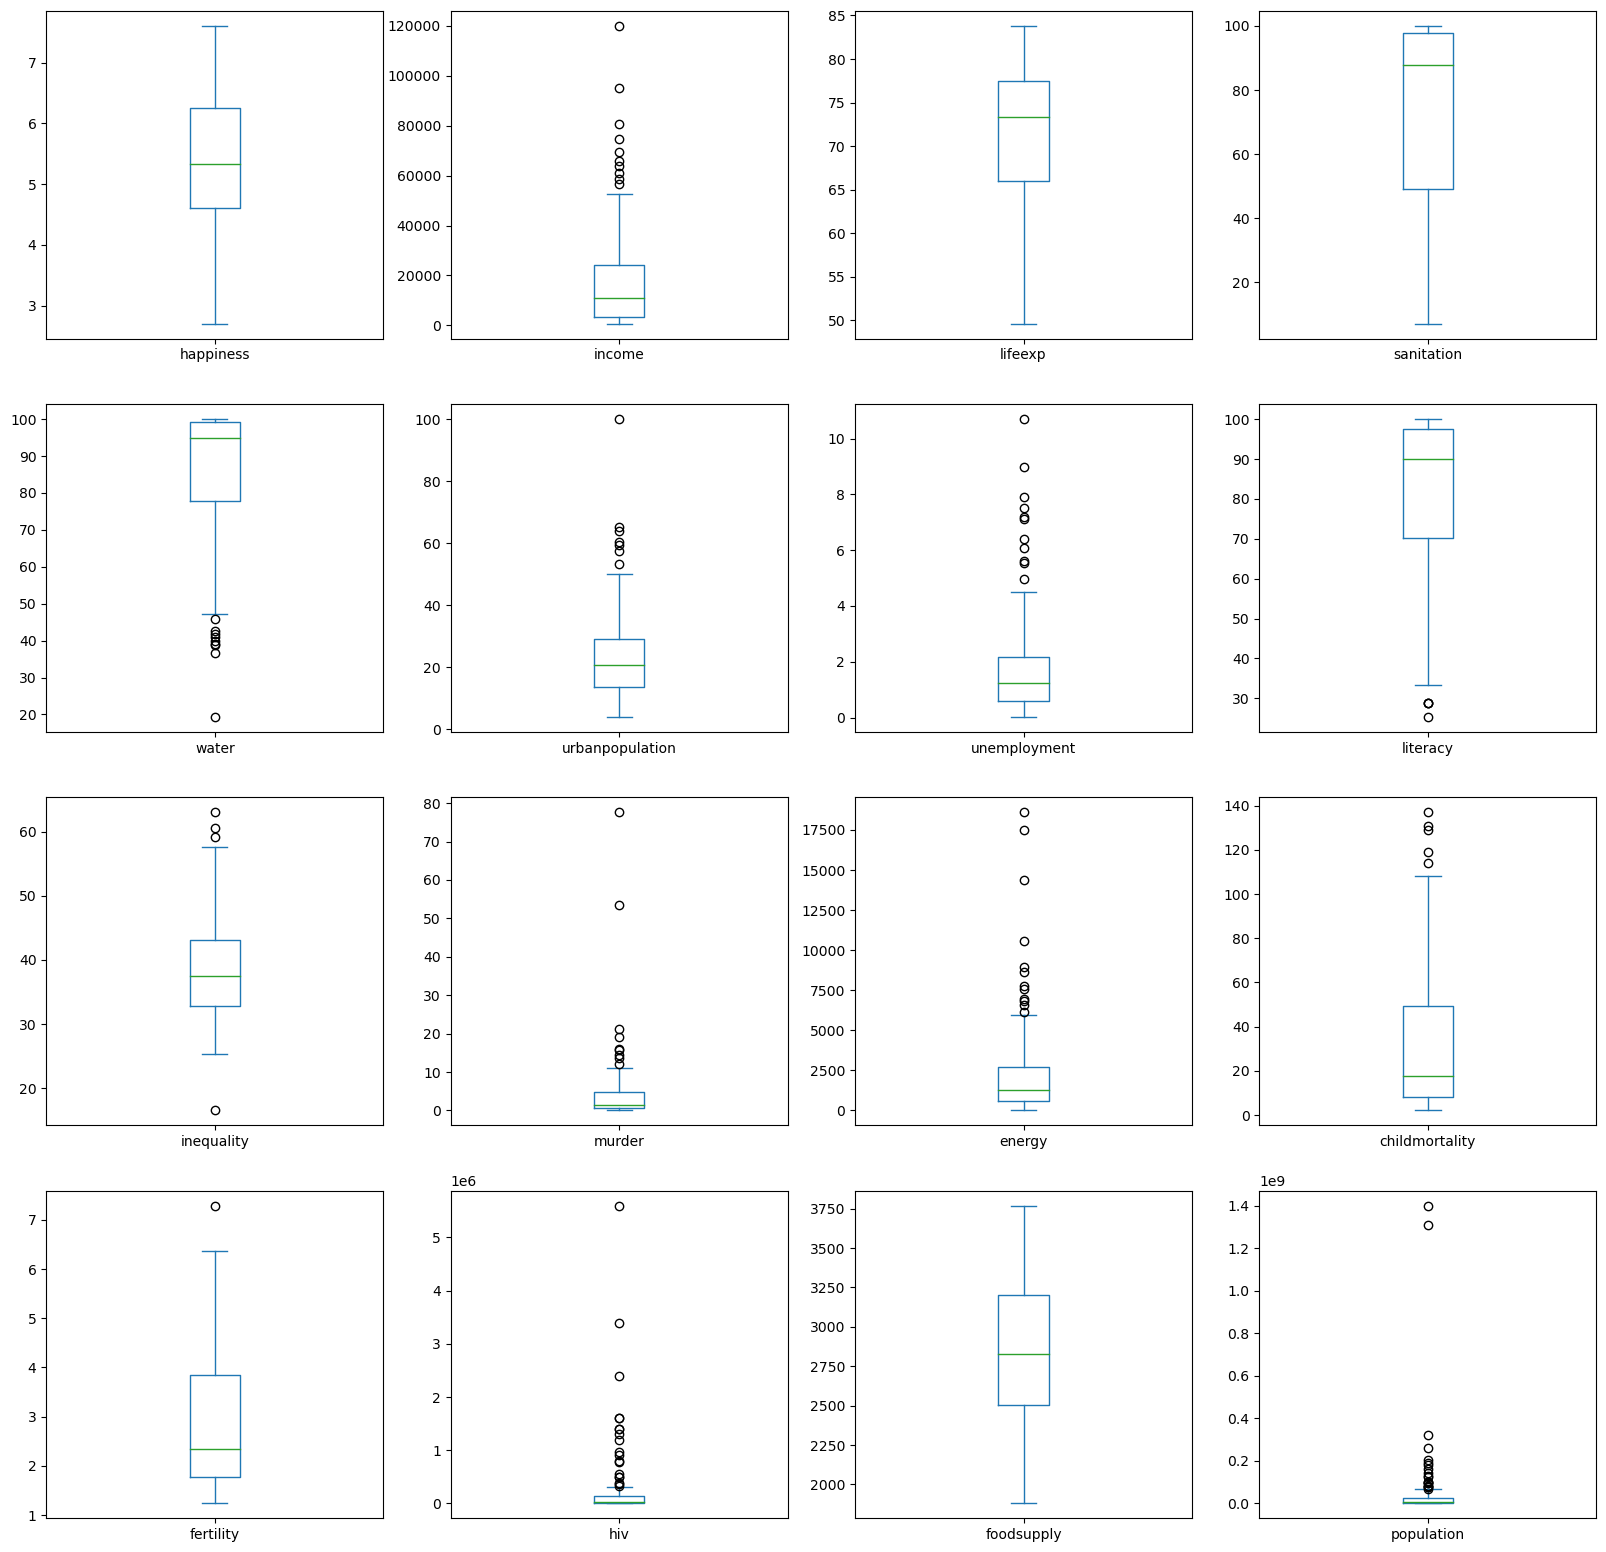

Comparative histograms for [3.9828546  4.60665083 6.69713068 4.34831953 7.30906057 7.07644701
 5.14677477 6.00737524 4.63347387 5.71890783 6.90421915 3.62466431
 5.08212852 5.83432913 5.11717796 3.7619648  6.54689693 4.86540127
 4.41893005 4.16216469 5.03796482 7.41277266 4.32267523 6.53274965
 5.30387783 6.38757181 4.69083023 3.90274167 6.85400438 5.20543814
 5.4391613  6.60801744 7.5144248  5.06186247 5.96407509 4.76253843
 6.01849604 5.62890863 4.57315493 7.44792557 6.35762501 4.66101265
 4.12194061 7.03713751 3.98591614 5.62251902 6.4649868  3.50469351
 3.56976247 4.84543657 5.34438324 7.49807072 4.34207916 5.04279995
 4.74995565 4.49337721 6.83012533 7.07941103 5.84768391 4.4450388
 5.87968445 5.40459347 5.94999504 4.35761786 6.14603186 4.90537596
 5.88059759 5.17197132 2.70159125 5.61540461 5.7113781  6.70157146
 4.97558975 3.59251404 3.86763835 6.32212114 4.58209848 6.61339426
 3.92266417 6.23628712 6.01747227 4.9827199  5.12492132 5.16315699
 4.54976749 4.22384644 4.81243658 7.

IndexError: tuple index out of range

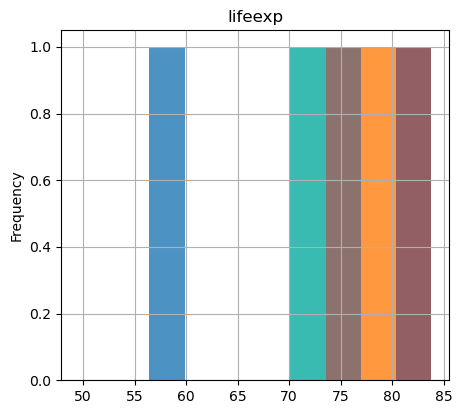

In [3]:
# Import Python libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import some convenient functions.  This can be found on the course github
from functions import *

# Load the data
dataset = pd.read_csv("world.csv")

# Inspect first few rows
dataset.head(12)

# Inspect data shape
dataset.shape

# Inspect descriptive stats
dataset.describe()


# View univariate histgram plots
histPlotAll(dataset)

# View univariate box plots
boxPlotAll(dataset)

# View class split
classComparePlot(dataset[["happiness","lifeexp","unemployment"]], 'happiness', plotType='hist')

# Split into input and output features
y = dataset["happiness"]
X = dataset[["lifeexp","unemployment"]]

# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

# Select algorithm
model = DecisionTreeClassifier()

# Fit model to the data
model.fit(X_train, y_train)

# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

# Evaluate the model on the test data
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))



In [4]:
# Library of Functions for the OpenClassrooms Supervised Learning Course

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import graphviz 
from sklearn import tree

def classComparePlot(df, class_name, plotType='density'):
    '''Show comparative plots comparing the distribution of each feature for each class.  plotType can be 'density' or 'hist' '''

    # Get the parameters for the plots
    numcols = len(df.columns) - 1
    unit_size = 5
    classes = df[class_name].nunique()           # no of uniques classes
    class_values = df[class_name].unique()       # unique class values

    print('Comparative histograms for',class_values)
    
    # Make the plots
    colors = plt.cm.get_cmap('tab10').colors
    fig = plt.figure(figsize=(unit_size,numcols*unit_size))
    ax = [None]*numcols 
    i = 0
    for col_name in df.columns:
        minVal = df[col_name].min()
        maxVal = df[col_name].max()
        
        if col_name != class_name:                
            ax[i] = fig.add_subplot(numcols,1,i+1)   
            for j in range(classes):   
                selectedCols = df[[col_name,class_name]]
                filteredRows = selectedCols.loc[(df[class_name]==class_values[j])]
                values = filteredRows[col_name]
                values.plot(kind=plotType,ax=ax[i],color=[colors[j]], alpha = 0.8, label=class_values[j], range=(minVal,maxVal))
                ax[i].set_title(col_name)
                ax[i].grid() 
            ax[i].legend()
            i += 1        

    plt.show()

def boxPlotAll(df):
    '''Show box plots for each feature'''
    
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols))

    plt.show()   
        
def histPlotAll(df):
    '''Show histograms for each feature'''

    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.hist(figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols))
            
    plt.show()               


def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show()   
  

def scatterMatrix(df):
    '''Show a scatter matrix of all features.'''
    unit_size = 5
    pd.plotting.scatter_matrix(df,figsize=(unit_size*4, unit_size*4),  diagonal='kde')
    plt.show()
        

def appendEqualCountsClass(df, class_name, feature, num_bins, labels):
    '''Append a new class feature named 'class_name' based on a split of 'feature' into clases with equal sample points.  Class names are in 'labels'.'''

    # Compute the bin boundaries
    percentiles = np.linspace(0,100,num_bins+1)
    bins = np.percentile(df[feature],percentiles)

    # Split the data into bins
    n = pd.cut(df[feature], bins = bins, labels=labels, include_lowest=True)

    # Add the new binned feature to a copy of the data
    c = df.copy()
    c[class_name] = n
    return c    

def logisticRegressionSummary(model, column_names):
    '''Show a summary of the trained logistic regression model'''

    # Get a list of class names
    numclasses = len(model.classes_)
    if len(model.classes_)==2:
        classes =  [model.classes_[1]] # if we have 2 classes, sklearn only shows one set of coefficients
    else:
        classes = model.classes_

    # Create a plot for each class
    for i,c in enumerate(classes):
        # Plot the coefficients as bars
        fig = plt.figure(figsize=(8,len(column_names)/3))
        fig.suptitle('Logistic Regression Coefficients for Class ' + str(c), fontsize=16)
        rects = plt.barh(column_names, model.coef_[i],color="lightblue")
        
        # Annotate the bars with the coefficient values
        for rect in rects:
            width = round(rect.get_width(),4)
            plt.gca().annotate('  {}  '.format(width),
                        xy=(0, rect.get_y()),
                        xytext=(0,2),  
                        textcoords="offset points",  
                        ha='left' if width<0 else 'right', va='bottom')        
        plt.show()
        #for pair in zip(X.columns, model_lr.coef_[i]):
        #    print (pair)

def decisionTreeSummary(model, column_names):
    '''Show a summary of the trained decision tree model'''

    # Plot the feature importances as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Decision tree feature importance', fontsize=16)
    rects = plt.barh(column_names, model.feature_importances_,color="khaki")

    # Annotate the bars with the feature importance values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left', va='bottom')    

    plt.show()

def linearRegressionSummary(model, column_names):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Linear Regression Coefficients', fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()


def viewDecisionTree(model, column_names):
    '''Visualise the decision tree'''

    dot_data = tree.export_graphviz(model, out_file=None,
            feature_names=column_names,
            class_names=model.classes_,
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data) 
    return graph    


def find_outliers(feature):
    '''Return a list of outliers in the data'''

    # Temporarily replace nulls with mean so they don't cause an error
    feature = feature.fillna(feature.mean()) 

    # Compute the quartiles
    quartile_1, quartile_3 = np.percentile(feature, [25, 75])

    # Compute the inter-quartile range
    iqr = quartile_3 - quartile_1

    # Compute the outlier boundaries
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    # Return rows where the feature is outside the outlier boundaries
    return np.where((feature > upper_bound) | (feature < lower_bound))

In [5]:
dataset=pd.read_csv("world.csv")
dataset.isnull().mean().sort_values()
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)
means=dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])
dataset.isnull().mean()

C:\Program Files\KMSpico\temp\ipykernel_13932\68927322.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means=dataset.mean().to_dict()


country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

In [6]:
dataset.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


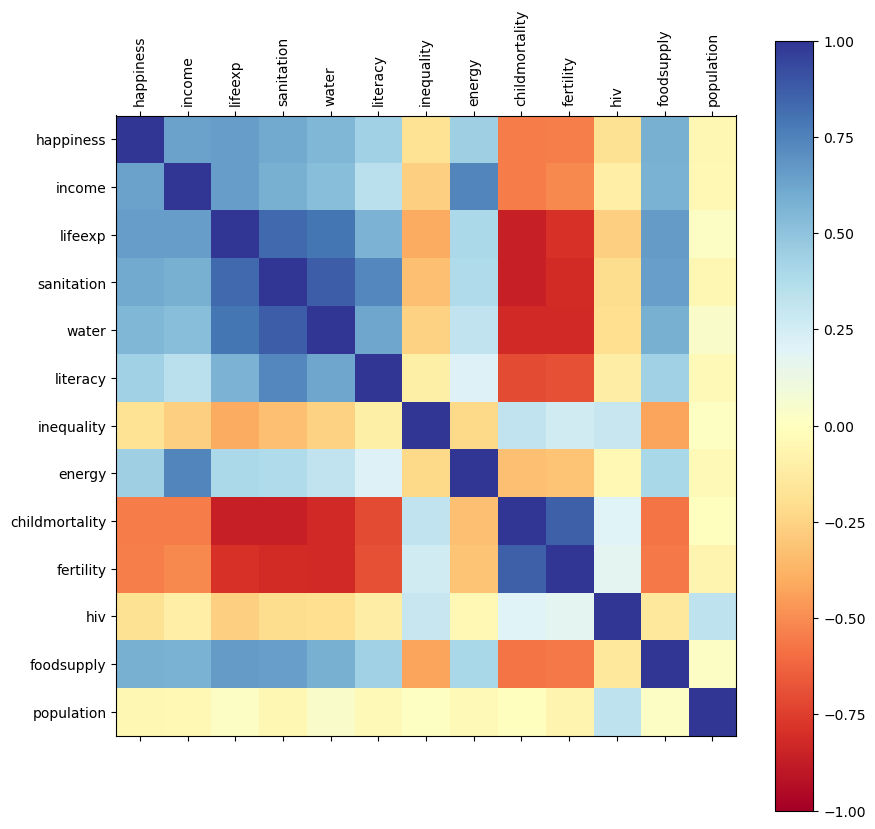

In [7]:
correlationMatrix(dataset)

Feature Engineering

In [8]:
dataset=appendEqualCountsClass(dataset,"lifeexp_band","lifeexp",3,["L","M","H"])
dataset.lifeexp_band.value_counts()

L    65
H    65
M    64
Name: lifeexp_band, dtype: int64

In [9]:
dataset[["lifeexp","lifeexp_band"]].head()

,lifeexp,lifeexp_band
0,57.9,L
1,77.6,H
2,76.5,H
3,75.4,M
4,82.6,H


In [10]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

In [11]:
y = dataset["lifeexp_band"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility', 'hiv', 'foodsupply', 'population']]
X.describe()
y.describe()

count     194
unique      3
top         L
freq       65
Name: lifeexp_band, dtype: object

In [12]:
from sklearn.preprocessing import MinMaxScaler
#rescamle the data 

scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
rescaledX
#Convert x back to a pandas dataframe
X=pd.DataFrame(rescaledX,columns=X.columns)
X.describe()


,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
test_size=0.33
seed=1
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)


ValueError: Unknown label type: 'continuous-multioutput'

In [14]:
from sklearn.linear_model import LogisticRegression 
model_lr=LogisticRegression(solver="lbfgs",multi_class='auto')

print(y_train.shape)
model_lr.fit(X_train,y_train)

(65, 12)


ValueError: y should be a 1d array, got an array of shape (65, 12) instead.

In [17]:
viewDecisionTree(model_dt,X.columns)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'classes_'

In [16]:
model_dt=DecisionTreeClassifier()
decisionTreeSummary(model_dt,X.columns)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 800x400 with 0 Axes>